In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("time")
    plt.ylabel("value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return slope * time

In [4]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time *2 * np.pi),
                   1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [5]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [6]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

In [7]:
time = np.arange(4*365 +1, dtype='float32')
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 4
series = baseline + trend(time, slope) +seasonality(time, period=365, amplitude=amplitude)
series += white_noise(time, noise_level, seed=43)

In [8]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [9]:
# lets make this into a function...
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series) # convert series to tf object - dataset
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) # define window and slice
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) # flatten data  
    dataset = dataset.shuffle(shuffle_buffer) # shiffles data
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # split data labels
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [10]:
spit_time = 1000
time_train = time[:spit_time]
x_train = series[:split_time]
time_val = time[spit_time:]
x_val = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000
train = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
validation = windowed_dataset(x_val, window_size, batch_size, shuffle_buffer_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

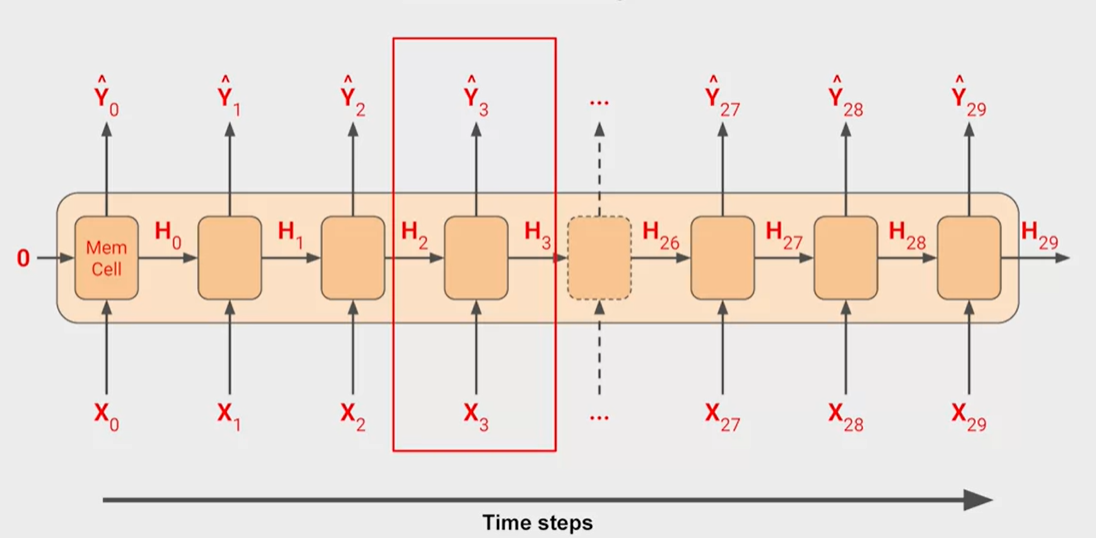

In [11]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

recurrent layers sequentially read in a series of inputs. feed in the RNN batches of sequences.
the input shape of RNNs in 3D;
Batch size,
time steps,
dimensionality of the input.


one cell to repeatedly compute the outputs, the cell state is then fed laterally into the next computation. at each time step. the memory cell takes in the value for the time step as well as the memory state. it calculates the output for the time step.

# batch size

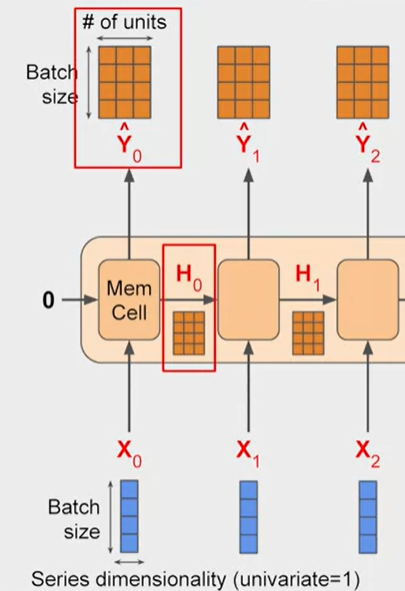

In [14]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

H0 is a copy of Y0.
this is not the typical behaviour of keras.
if you want this you will need to specify the parameter: return_sequence=True.
otherwise the label values will be ignored and it will only return the final yhat value.

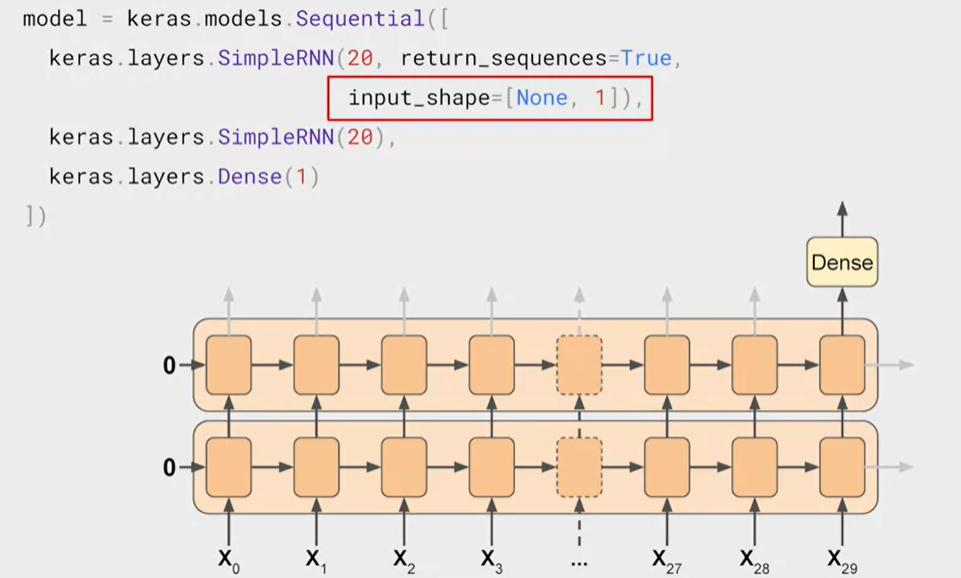

In [15]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

input shape is set to none, this is because tf assumes the dimensions are the batch size. so no need to specify. next dimension is time steps. this is set to none, this means the RNN can handle sequences of any amount of time steps. then the final dimension of 1 as its a univariate time series

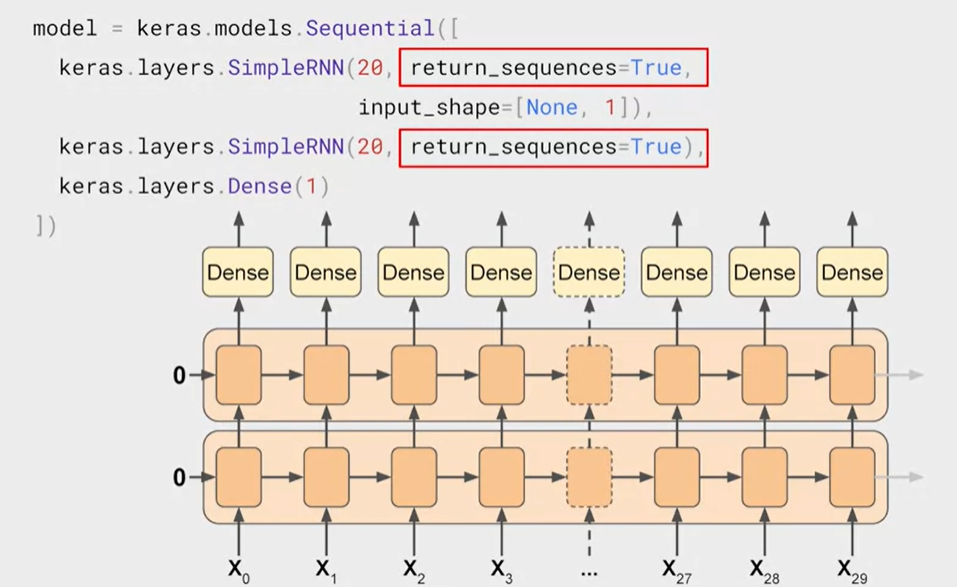

In [16]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

same dense layer independantly at each time step.

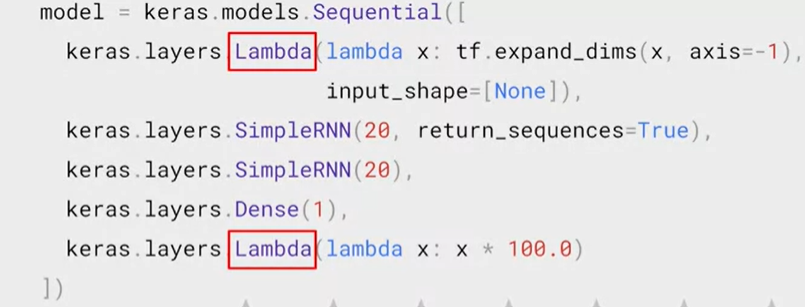

In [18]:
Image.open(r'C:\Users\44788/Desktop\it7.png')

lambda layers allow us to modify things within the network.
the first layer is useful as it means we dont need to adjust window function.
the second is useful as we are using tanh as the activation function and its more compliant with larger values.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(1e-08, 0.001, 0.0, 300.0)

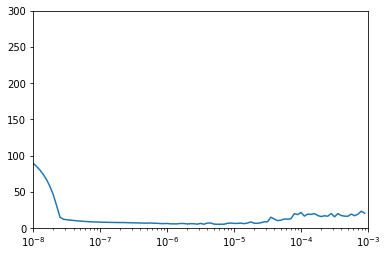

In [11]:
model = Sequential([
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    SimpleRNN(40, return_sequences=True),
    SimpleRNN(40),
    Dense(1),
    Lambda(lambda x: x * 100.0)
])

lr_schedule = LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

model.compile(loss=Huber(), optimizer=SGD(lr=1e-8, momentum=0.9), metrics=['mae'])
history = model.fit(train, epochs=100, verbose=0, callbacks=[lr_schedule])

lrs = 1e-8 *(10**(np.arange(100)/20)) 
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [12]:
model = Sequential([
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    SimpleRNN(40, return_sequences=True),
    SimpleRNN(40),
    Dense(1),
    Lambda(lambda x: x * 100.0)
])

model.compile(loss=Huber(), optimizer=SGD(lr=5e-5, momentum=0.9), metrics=['mae'])
history = model.fit(train, epochs=300, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


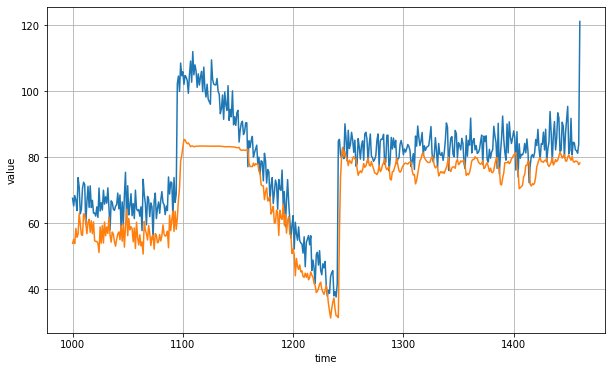

In [13]:
forecast=[]
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [14]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

8.692309

In [ ]:
tf.keras.backend.clear_session()

In [18]:
model = Sequential([
    Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1),
    Lambda(lambda x: x * 100.0)
])

model.compile(loss="mse", optimizer=SGD(lr=1e-6, momentum=0.9), metrics=['mae'])
history = model.fit(train, epochs=100, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


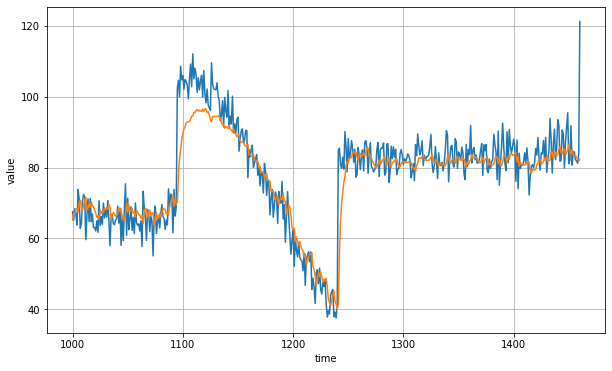

In [19]:
forecast=[]
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)